<a href="https://colab.research.google.com/github/azavalae/fisica_computacional/blob/main/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

# Ejercicio 1



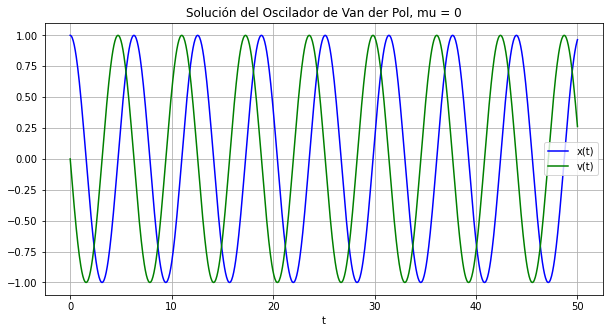

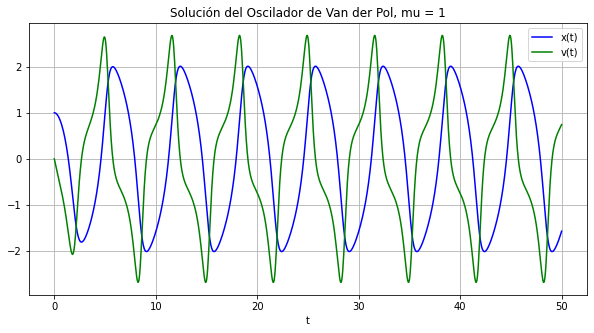

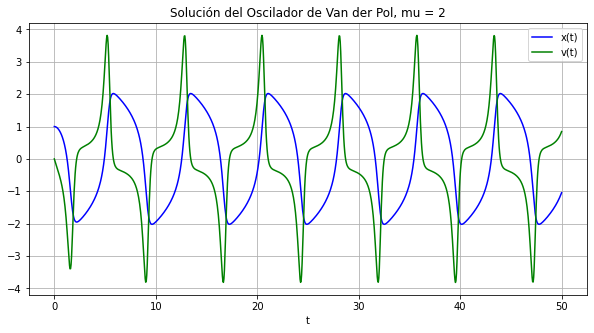

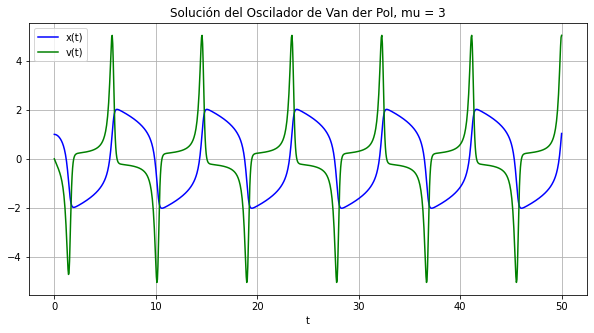

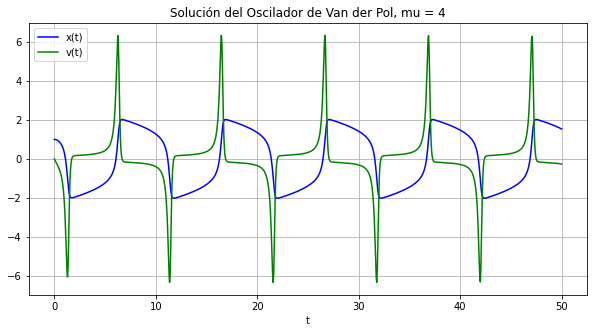

In [ ]:
from scipy.integrate import odeint

# Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
# La solución y es un arreglo 1-D, y=(theta, omega), dy/dt es un arreglo

def oscilador(y, t, u):
        x, v = y
        dydt = [v, u*(1-x*x)*v-x]
        return dydt

# Definimos las constantes g, la longitud l del péndulo y el coeficiente de fricción b.
u = 0.0
u1 = 1.0
u2 = 2.0
u3 = 3.0
u4 = 4.0

# Definimos las condiciones iniciales theta=0.2, y omega = 0 (el péndulo de "suelta")
y0 = [1.0, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 1000)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(oscilador, y0, t, args=(u,))
y1 = odeint(oscilador, y0, t, args=(u1,))
y2 = odeint(oscilador, y0, t, args=(u2,))
y3 = odeint(oscilador, y0, t, args=(u3,))
y4 = odeint(oscilador, y0, t, args=(u4,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 0')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y1[:, 0], 'b', label='x(t)')
plt.plot(t, y1[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 1')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y2[:, 0], 'b', label='x(t)')
plt.plot(t, y2[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 2')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y3[:, 0], 'b', label='x(t)')
plt.plot(t, y3[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 3')
plt.xlabel('t')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, y4[:, 0], 'b', label='x(t)')
plt.plot(t, y4[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 4')
plt.xlabel('t')
plt.grid()
plt.show()

# Ejercicio 2

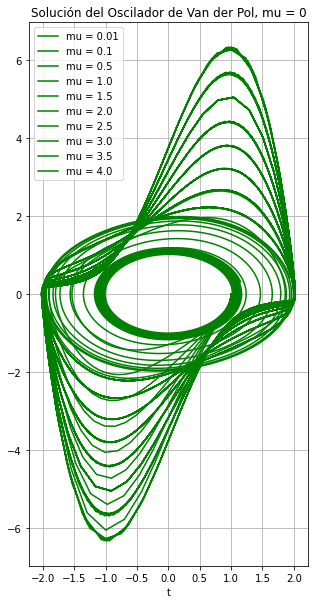

In [ ]:
y_a = odeint(oscilador, y0, t, args=(0.01,))
y_b = odeint(oscilador, y0, t, args=(0.1,))
y_c = odeint(oscilador, y0, t, args=(0.5,))
y_d = odeint(oscilador, y0, t, args=(1,))
y_e = odeint(oscilador, y0, t, args=(1.5,))
y_f = odeint(oscilador, y0, t, args=(2,))
y_g = odeint(oscilador, y0, t, args=(2.5,))
y_h = odeint(oscilador, y0, t, args=(3,))
y_i = odeint(oscilador, y0, t, args=(3.5,))
y_j = odeint(oscilador, y0, t, args=(4,))

plt.figure(figsize=(5,10))
plt.plot(y_a[:, 0], y_a[:, 1], 'g', label='mu = 0.01')
plt.plot(y_b[:, 0], y_b[:, 1], 'g', label='mu = 0.1')
plt.plot(y_c[:, 0], y_c[:, 1], 'g', label='mu = 0.5')
plt.plot(y_d[:, 0], y_d[:, 1], 'g', label='mu = 1.0')
plt.plot(y_e[:, 0], y_e[:, 1], 'g', label='mu = 1.5')
plt.plot(y_f[:, 0], y_f[:, 1], 'g', label='mu = 2.0')
plt.plot(y_g[:, 0], y_g[:, 1], 'g', label='mu = 2.5')
plt.plot(y_h[:, 0], y_h[:, 1], 'g', label='mu = 3.0')
plt.plot(y_i[:, 0], y_i[:, 1], 'g', label='mu = 3.5')
plt.plot(y_j[:, 0], y_j[:, 1], 'g', label='mu = 4.0')
plt.legend(loc='best')
plt.title('Solución del Oscilador de Van der Pol, mu = 0')
plt.xlabel('t')
plt.grid()
plt.show()

#Ejercicio 3

In [5]:
def odeEuler(f,y0,t):
    '''Aproxima la solución de y'=f(y,t) por el método de Euler.
    
    Parámetros
    ----------
    f : La función dada por el lado derecho de la ecuación diferencial 
         y'=f(t,y), y(t_0)=y_0
    y0 : El valor inicial de y al tiempo y(t0)=y0 
    t : Arreglo unidimensional de 1D. El tamaño del paso h = t[n+1] - t[n].
    
    Regresa
    -------
    y : 1D Arreglo con la aproximación de y[n] de la solución y(t_n) calculada 
    con el método de  Euler.
    '''
    # Definimos el arreglo para las soluciones del tamaño del tiempo de integración
    y = np.zeros(len(t))
    
    # La condición inicial que debe satisfacer la solución
    y[0] = y0
    
    # LA integración por el método de Euler
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

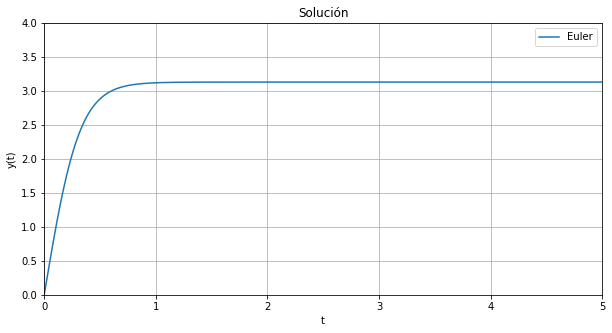

In [26]:
t = np.linspace(0,5,501)
y0 = 0
# Definimos la función f(t,y) = y**2
f = lambda y,t: 9.8-y**2
# Usamos el método de Euler
y = odeEuler(f,y0,t)

plt.figure(figsize=(10,5))
plt.plot(t,y)
plt.legend(['Euler'])
plt.grid()
plt.axis([0,5,0,4])
plt.title("Solución")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

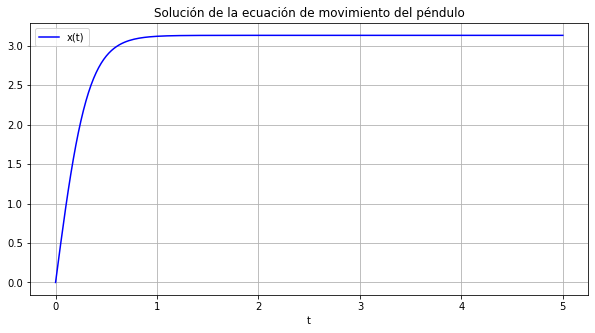

In [25]:
def ecuación(y, t, g, k):
        x, v = y
        dydt = [v, g-k*v**2]
        return dydt

# Definimos las constantes g, la longitud l del péndulo y el coeficiente de fricción b.
g = 9.81
k = 1.0

# Definimos las condiciones iniciales theta=0.2, y omega = 0 (el péndulo de "suelta")
y0 = [0.0, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(0, 5, 201)

# Usamos el método de integración de scipy.integrate.odeint

y = odeint(ecuación, y0, t, args=(g, k))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 1], 'b', label='x(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación de movimiento del péndulo')
plt.xlabel('t')
plt.grid()
plt.show()